First 5 entries in the dataset:
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


<ipython-input-10-7ca7e1a121be>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['type'], order=data['type'].value_counts().index, palette='Set2')


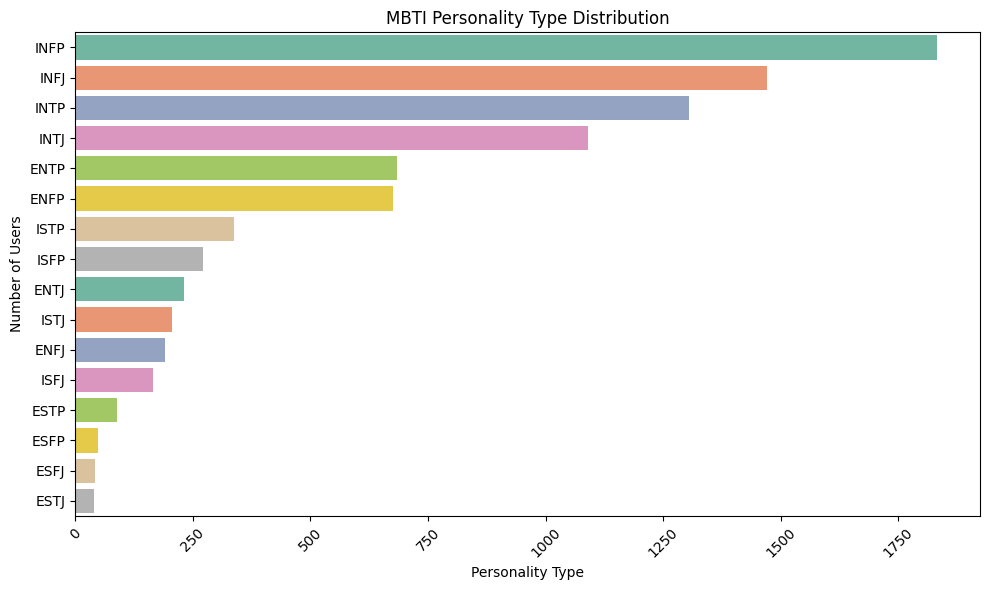


🔹 Training model for trait: IE
🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1335
           1       0.79      0.25      0.38       400

    accuracy                           0.81      1735
   macro avg       0.80      0.61      0.63      1735
weighted avg       0.81      0.81      0.77      1735


🔹 Training model for trait: NS
🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1522
           1       0.71      0.09      0.17       213

    accuracy                           0.88      1735
   macro avg       0.80      0.54      0.55      1735
weighted avg       0.87      0.88      0.84      1735


🔹 Training model for trait: TF
🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       799
           1       0.85      0.85      0.85       936

    accurac

<ipython-input-10-7ca7e1a121be>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='pastel')


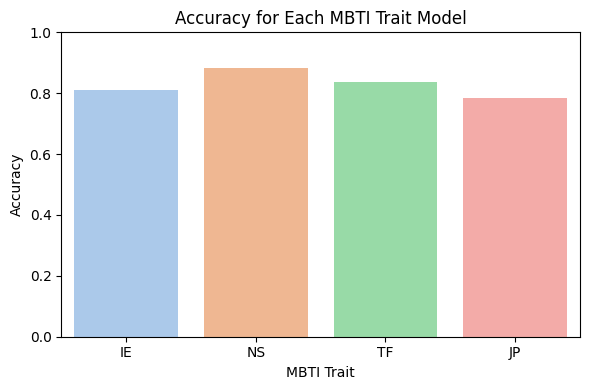


🧠 Predicted MBTI Type for Sample Text:
INTP


In [10]:
# Import necessary libraries
import pandas as pd  # For reading and handling dataset
import re  # For regular expression (text cleaning)
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For improved graph styling

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # To split dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text to numbers
from sklearn.linear_model import LogisticRegression  # Classification model
from sklearn.metrics import classification_report, accuracy_score  # For evaluating the model

#  Step 1: Load the MBTI dataset
# Ensure 'mbti_1.csv' is in the same directory as your Python file
data = pd.read_csv("/content/mbti_1.csv")

# Display the first 5 rows of the dataset
print("First 5 entries in the dataset:")
print(data.head())

# Plot 1: Show how many users belong to each MBTI personality type
plt.figure(figsize=(10, 6))  # Set figure size
sns.countplot(data['type'], order=data['type'].value_counts().index, palette='Set2')
plt.title("MBTI Personality Type Distribution")
plt.xlabel("Personality Type")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Step 2: Clean the text using a function
def clean_text(text):
    text = text.lower()  # Convert all characters to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters and numbers
    return text

# Apply the cleaning function to all posts
data['cleaned'] = data['posts'].apply(clean_text)

#  Step 3: Create binary labels for each MBTI letter
# Example: Type "INTJ" → ['I', 'N', 'T', 'J']
# We classify each letter separately

# If first letter is I (Introvert), label 0; else E (Extrovert), label 1
data['IE'] = data['type'].apply(lambda x: 0 if x[0] == 'I' else 1)
data['NS'] = data['type'].apply(lambda x: 0 if x[1] == 'N' else 1)
data['TF'] = data['type'].apply(lambda x: 0 if x[2] == 'T' else 1)
data['JP'] = data['type'].apply(lambda x: 0 if x[3] == 'J' else 1)

#  Step 4: Convert cleaned text into numeric features using TF-IDF
# TF-IDF (Term Frequency–Inverse Document Frequency) gives importance to words
vectorizer = TfidfVectorizer(max_features=3000)  # Limit to top 3000 words
X = vectorizer.fit_transform(data['cleaned'])  # Fit and transform text

# Create output labels (target variables)
y = data[['IE', 'NS', 'TF', 'JP']]

#  Step 5: Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 📌 Step 6: Train separate Logistic Regression models for each MBTI trait
models = {}  # Dictionary to hold models
accuracy_scores = {}  # To store accuracy of each trait model

# Loop over each MBTI trait
for trait in ['IE', 'NS', 'TF', 'JP']:
    print(f"\n🔹 Training model for trait: {trait}")
    model = LogisticRegression(max_iter=1000)  # Create model
    model.fit(X_train, y_train[trait])  # Train on respective trait
    models[trait] = model  # Save the model

    # Predict on test data
    y_pred = model.predict(X_test)
    # Calculate and save accuracy
    acc = accuracy_score(y_test[trait], y_pred)
    accuracy_scores[trait] = acc

    # Show detailed classification report
    print("🔍 Classification Report:")
    print(classification_report(y_test[trait], y_pred))

#  Plot 2: Visualize accuracy of each trait prediction
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='pastel')
plt.title("Accuracy for Each MBTI Trait Model")
plt.xlabel("MBTI Trait")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#  Step 7: Create a function to predict MBTI type from new text
def predict_mbti(text):
    cleaned = clean_text(text)  # Clean the input
    features = vectorizer.transform([cleaned])  # Convert to TF-IDF vector
    result = ""
    result += "I" if models['IE'].predict(features)[0] == 0 else "E"
    result += "N" if models['NS'].predict(features)[0] == 0 else "S"
    result += "T" if models['TF'].predict(features)[0] == 0 else "F"
    result += "J" if models['JP'].predict(features)[0] == 0 else "P"
    return result

#  Step 8: Try predicting on a new sample text
sample_text = "I enjoy thinking deeply about abstract ideas and prefer calm environments."
predicted_type = predict_mbti(sample_text)
print("\n🧠 Predicted MBTI Type for Sample Text:")
print(predicted_type)
